In [1]:
import numpy as np
import dml
from dml.dml_plot import classifier_plot, knn_plot
from dml.base import Euclidean
from dml.knn import kNN
from dml.nca import NCA
from dml.lmnn import LMNN
from dml.itml import ITML
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import sklearn

/tmp/ipykernel_205375/2761256147.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from dml.nca import NCA


In [2]:
# Load all data from each class
Xs = []
ys = []
for i in range(1, 51): 
    X = np.lib.format.read_array(open(f'../class{i}_feat.npy', 'rb'))
    y = np.lib.format.read_array(open(f'../class{i}_label.npy', 'rb'))
    Xs.append(X)
    ys.append(np.zeros(y.shape) + i - 1)
Xall = np.concatenate(Xs)
yall = np.concatenate(ys)
print(Xall.shape)
print()

(1114, 900)



In [3]:
# Load class elements that are not simpler than the center
Xs = []
ys = []
for i in range(1, 51): 
    X = np.lib.format.read_array(open(f'../class{i}_feat.npy', 'rb'))
    y = np.lib.format.read_array(open(f'../class{i}_label.npy', 'rb'))
    yidx = np.in1d(y, [0, 1])
    Xs.append(X[yidx])
    ys.append(np.zeros(y[yidx].shape) + i - 1)
Xc = np.concatenate(Xs)
yc = np.concatenate(ys)
print(Xc.shape)
print()

(353, 900)



In [48]:
X = np.lib.format.read_array(open(f'../random_pat_size_9-features.npy', 'rb'))
y = np.lib.format.read_array(open(f'../random_pat_size_9-classes.npy', 'rb'))

In [49]:
y.shape

(921,)

In [50]:
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split

def train_and_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = neighbors.KNeighborsClassifier()
    knn_model_1 = knn.fit(X_train, y_train)
    return knn_model_1.score(X_test, y_test)
    
print('k-NN accuracy for random set: %f' % train_and_test(X, y))

k-NN accuracy for random set: 0.800000


In [272]:
knn_model_1.score?

Class 3 ***************************************


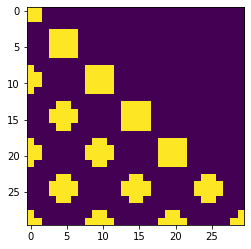

Class 0 ***************************************


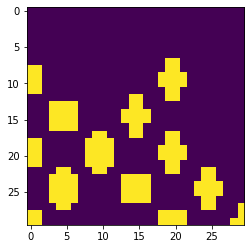

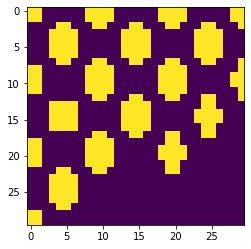

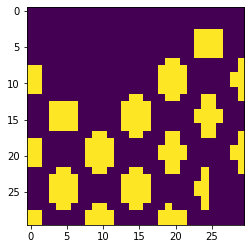

Class 4 ***************************************


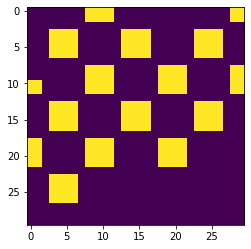

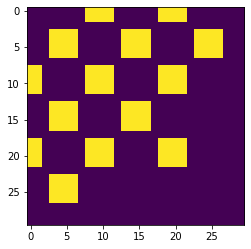

Class 3 ***************************************


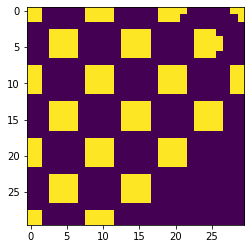

Class 2 ***************************************


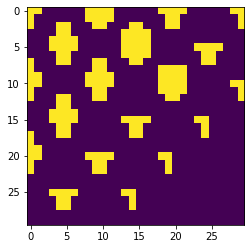

Class 4 ***************************************


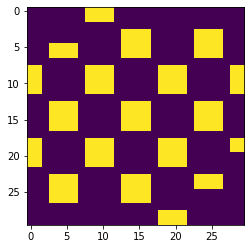

Class 0 ***************************************


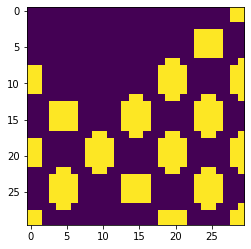

Class 4 ***************************************


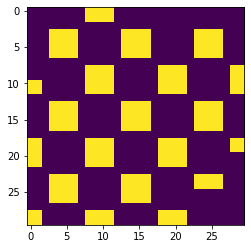

Class 0 ***************************************


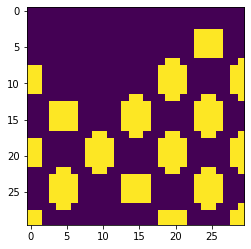

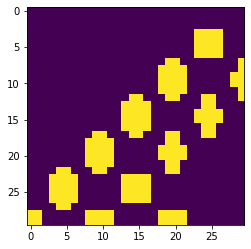

Class 1 ***************************************


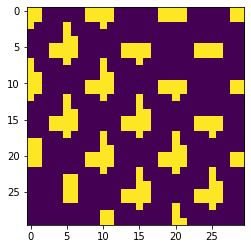

Class 4 ***************************************


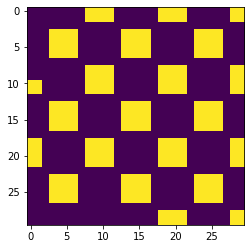

Class 3 ***************************************


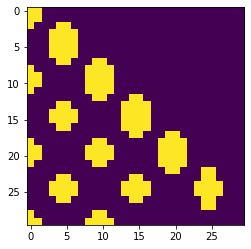

Class 4 ***************************************


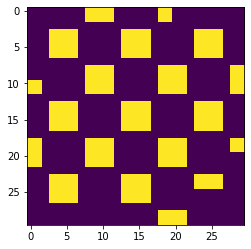

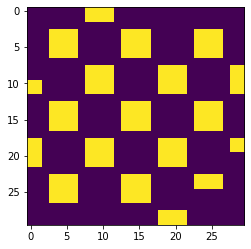

Class 2 ***************************************


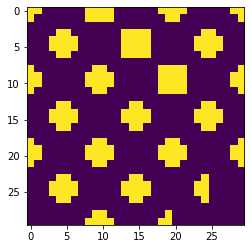

Class 1 ***************************************


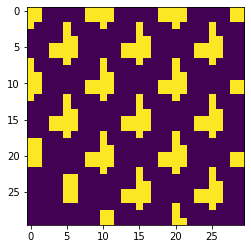

Class 3 ***************************************


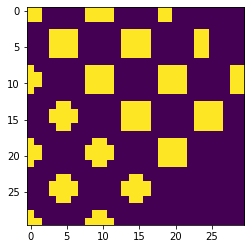

Class 0 ***************************************


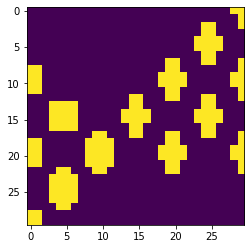

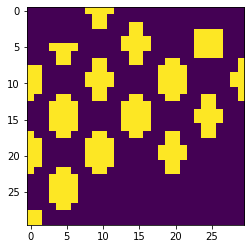

Class 4 ***************************************


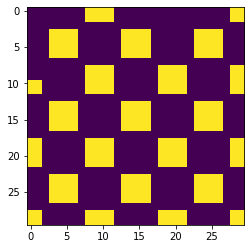

Class 0 ***************************************


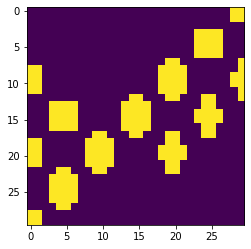

Class 4 ***************************************


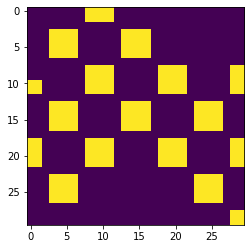

Class 1 ***************************************


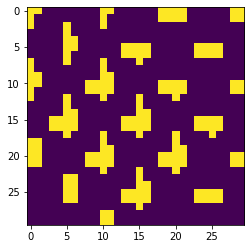

Class 3 ***************************************


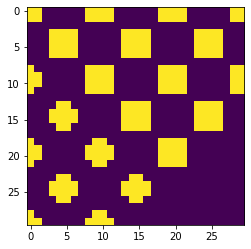

Class 2 ***************************************


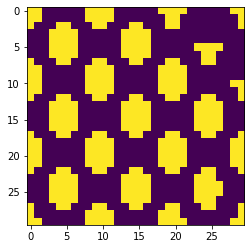

Class 4 ***************************************


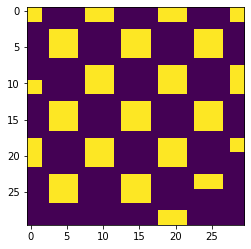

Class 0 ***************************************


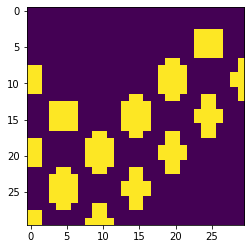

Class 1 ***************************************


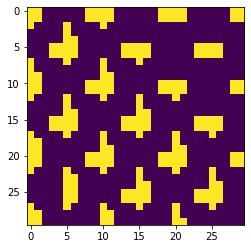

Class 3 ***************************************


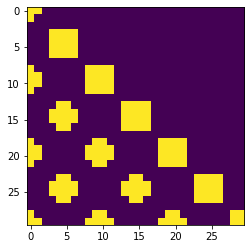

Class 2 ***************************************


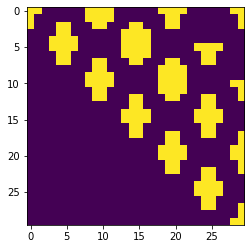

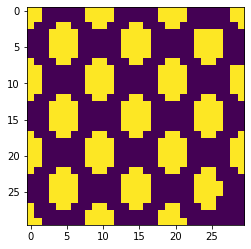

Class 1 ***************************************


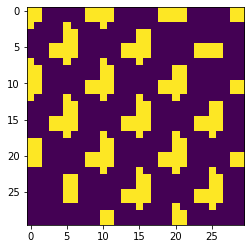

Class 4 ***************************************


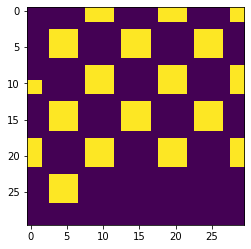

Class 0 ***************************************


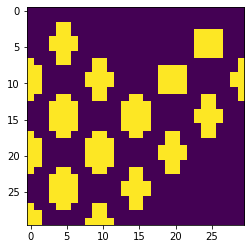

Class 2 ***************************************


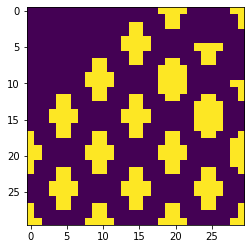

Class 1 ***************************************


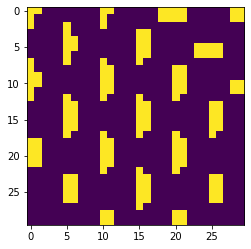

Class 2 ***************************************


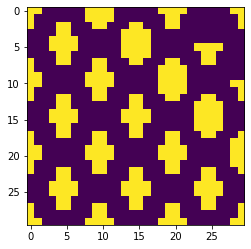

Class 0 ***************************************


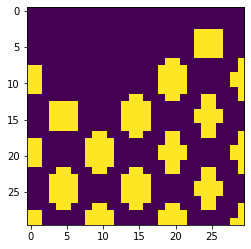

Class 2 ***************************************


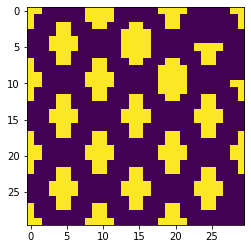

Class 1 ***************************************


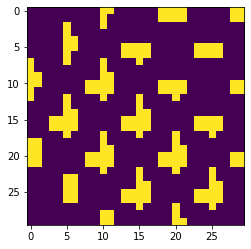

Class 3 ***************************************


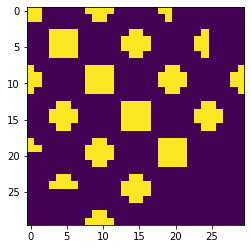

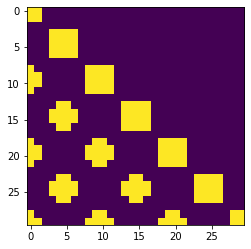

Class 0 ***************************************


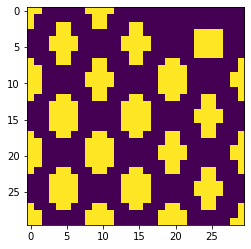

Class 4 ***************************************


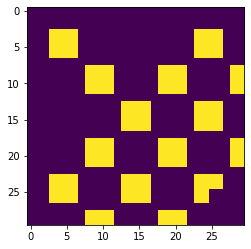

Class 0 ***************************************


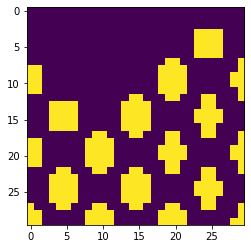

Class 3 ***************************************


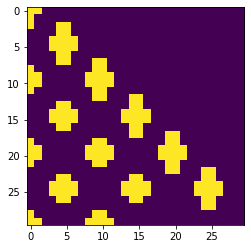

Class 2 ***************************************


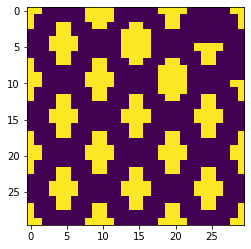

Class 4 ***************************************


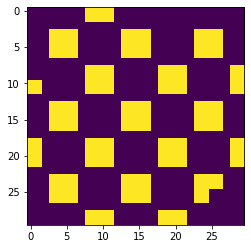

Class 0 ***************************************


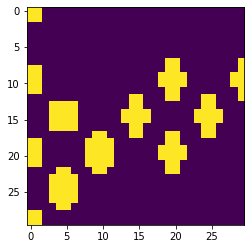

Class 3 ***************************************


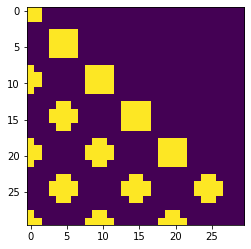

Class 2 ***************************************


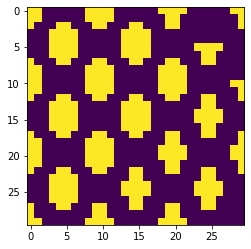

Class 3 ***************************************


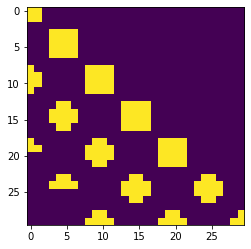

Class 0 ***************************************


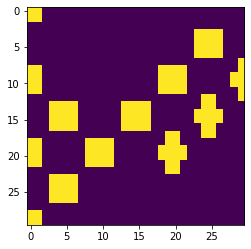

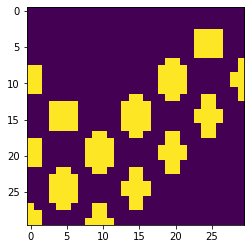

Class 1 ***************************************


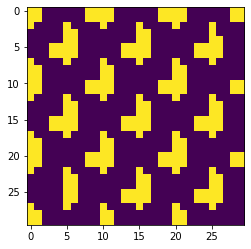

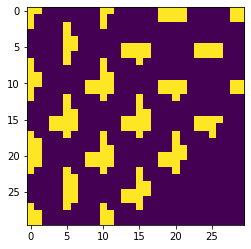

Class 3 ***************************************


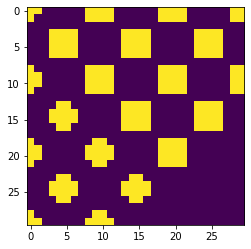

Class 0 ***************************************


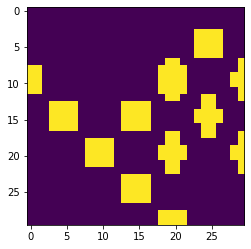

Class 4 ***************************************


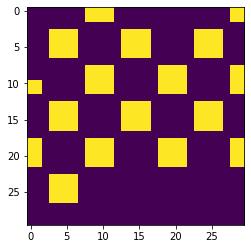

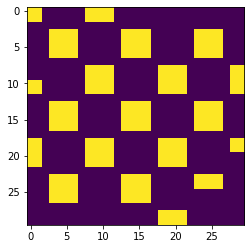

Class 2 ***************************************


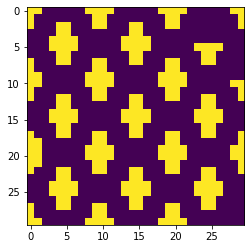

Class 3 ***************************************


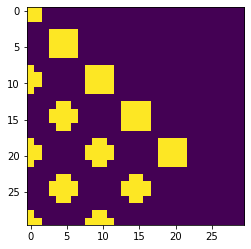

Class 0 ***************************************


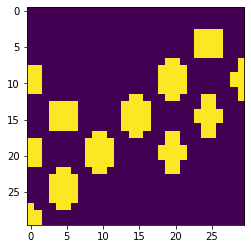

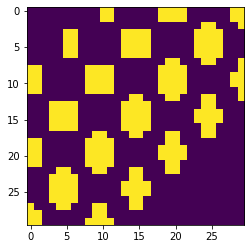

Class 4 ***************************************


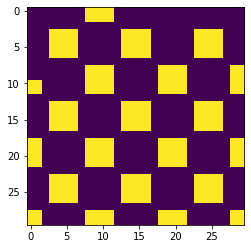

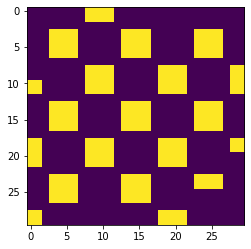

Class 3 ***************************************


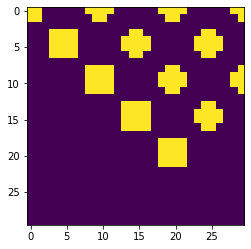

Class 0 ***************************************


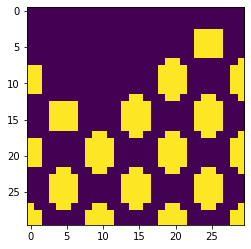

Class 1 ***************************************


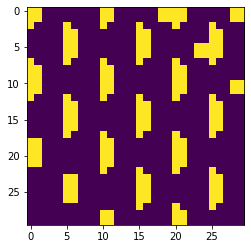

Class 2 ***************************************


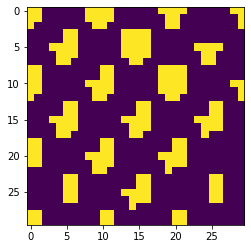

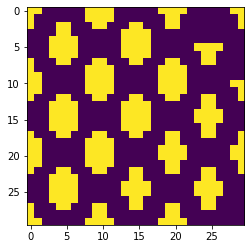

Class 0 ***************************************


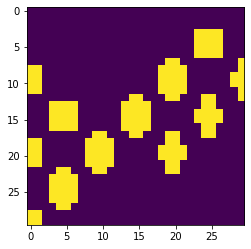

Class 1 ***************************************


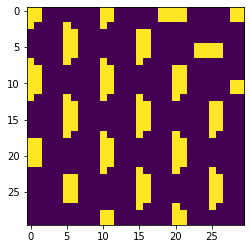

Class 0 ***************************************


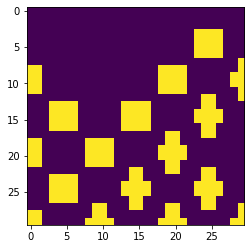

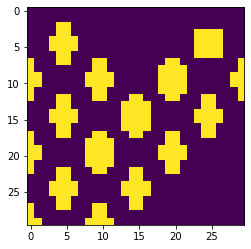

Class 3 ***************************************


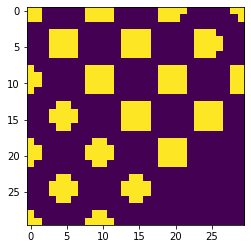

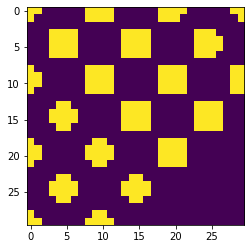

Class 1 ***************************************


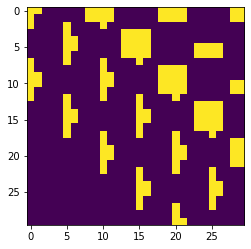

Class 4 ***************************************


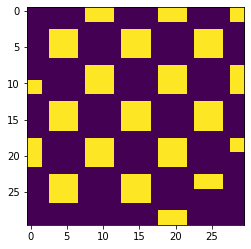

Class 0 ***************************************


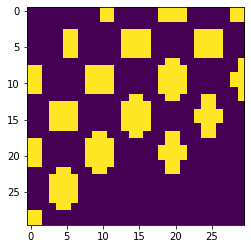

Class 4 ***************************************


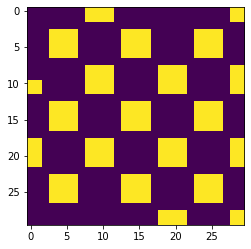

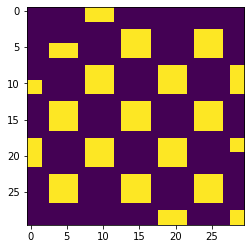

Class 3 ***************************************


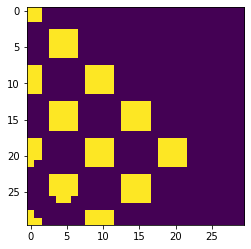

Class 0 ***************************************


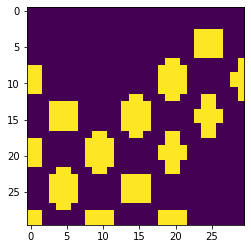

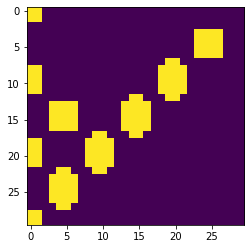

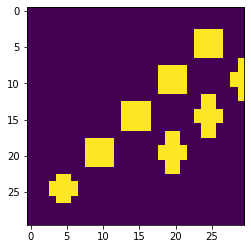

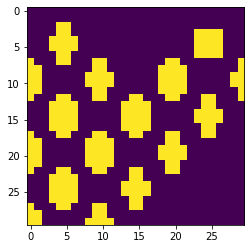

Class 1 ***************************************


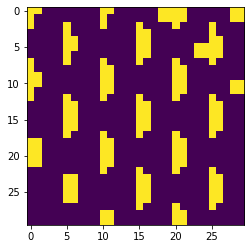

Class 0 ***************************************


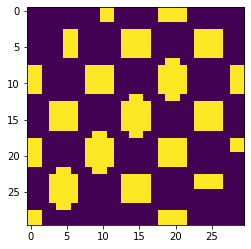

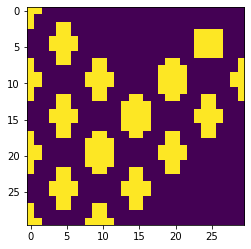

Class 2 ***************************************


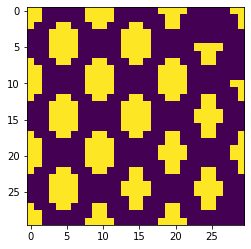

Class 4 ***************************************


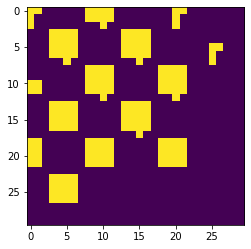

Class 0 ***************************************


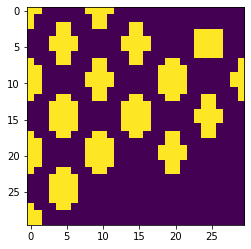

Class 3 ***************************************


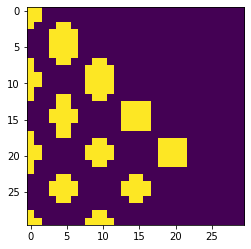

Class 1 ***************************************


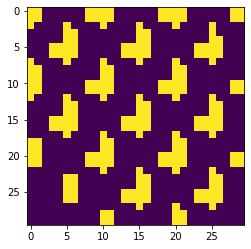

Class 4 ***************************************


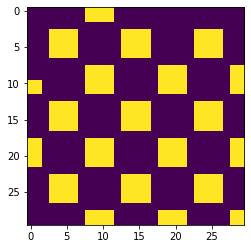

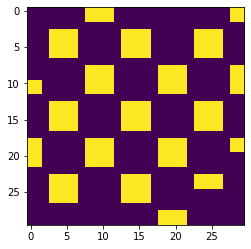

Class 0 ***************************************


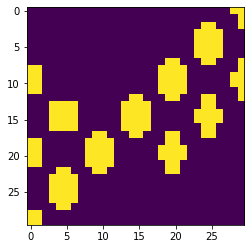

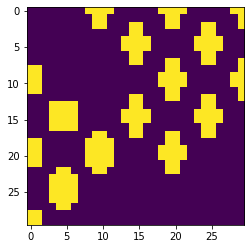

Class 1 ***************************************


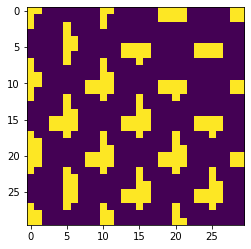

Class 4 ***************************************


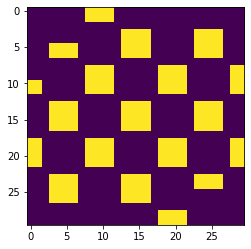

Class 1 ***************************************


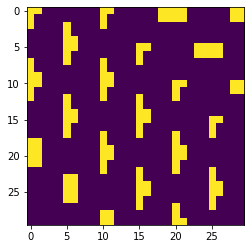

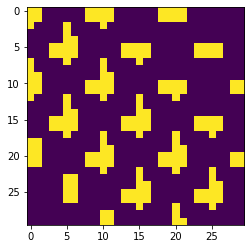

Class 0 ***************************************


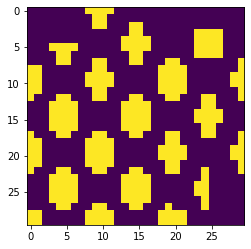

In [45]:
prev_class = -1
for f, c in zip(X, y):
    if prev_class != c:
        print('Class %d ***************************************' % c)
        prev_class = c
    plt.imshow(f.reshape((30, 30)), interpolation='nearest')
    plt.show()

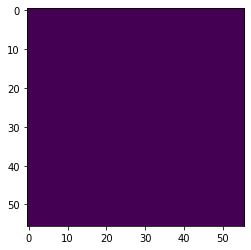

In [12]:
from collections import defaultdict
import itertools

def overlap(X, y):
    n_classes = len(set(y))
    overlap = np.zeros((n_classes, n_classes))

    has_class = defaultdict(set)
    for f, c in zip(X, y):
        has_class[tuple(f)].add(c)

    for (k, v) in has_class.items():
        for (c1, c2) in itertools.combinations(v, r=2):
            overlap[int(c1), int(c2)] += 1
            overlap[int(c2), int(c1)] += 1
    return overlap

def remove_overlaps(X, y):
    lp = overlap(X, y).sum(axis=0)
    print(lp)

all_overlap = overlap(X, y)

plt.imshow(all_overlap)
plt.show()

In [14]:
from metric_learn import ITML_Supervised
import random

def sample_min(l, k):
    k = min(len(l), k)
    return random.sample(l, k)

def train_itml(X, y):
    dist = ITML_Supervised(verbose=True)
    dist.fit(X, y)
    print(dist.score(X, y))
    return dist

In [15]:
dist = train_itml(X, y)

/home/feser/.local/lib/python3.9/site-packages/metric_learn/constraints.py:211: UserWarning: Only generated 4400 positive constraints (requested 62720)
  warnings.warn("Only generated %d %s constraints (requested %d)" % (
/home/feser/.local/lib/python3.9/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


KeyboardInterrupt: 

In [61]:
Xt = dist.transform(Xc)
train_and_test(Xt, yc)

0.5070422535211268

In [ ]:
Xt = dist.transform

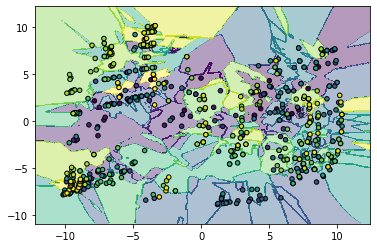

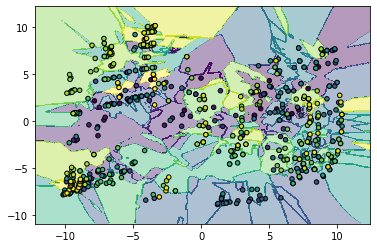

In [256]:
classifier_plot(X, y, knn_model_1, label_legend = False, fitted=True)

In [223]:
pred = LMNN()
pca = PCA()
pca.set_params(n_components=10)
pca.fit(X, y)

PCA(n_components=10)

In [224]:
pred.fit(pca.fit_transform(X, y), y)
print(pred.score(), pred.score_orig())

ValueError: shape mismatch: value array of shape (2,2) could not be broadcast to indexing result of shape (2,3)

In [65]:
y.shape

(921,)

In [155]:
dist = np.lib.format.read_array(open(f'../dist.npy', 'rb'))
features = np.lib.format.read_array(open(f'../features.npy', 'rb'))


In [157]:
features.shape

(54, 900)

In [158]:
np.histogram(dist, range(10))

(array([ 54, 258, 564, 964, 882, 194,   0,   0,   0]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [124]:
np.histogram(dist, range(10))

(array([200906, 597564, 138912, 352682, 321176, 151402,  38158,   5536,
             0]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

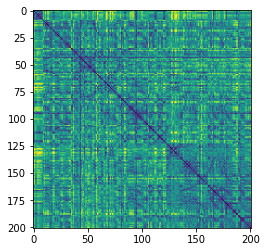

In [133]:
plt.imshow(dist)
plt.show()

In [63]:
from collections import defaultdict

classes = defaultdict(list)
for i, x in enumerate(X):
    classes[y[i]].append(i)
classes = {k: np.array(classes[k]) for k in classes}
    
rng = np.random.default_rng()
n_triples = 100_000
triples = []
while len(triples) < n_triples:
    c1, c2 = tuple(rng.choice(y, size=2, replace=False))
    anchor, near = tuple(rng.choice(classes[c1], size = 2, replace = False))
    far = rng.choice(classes[c2])
    triples.append((anchor, near, far))
triples = np.array(triples)
np.save(open('../triples.npy', 'wb'), triples)

In [64]:
triples

array([[837, 886, 711],
       [ 34, 488, 750],
       [641, 499,  38],
       ...,
       [155, 628, 106],
       [353, 545, 650],
       [310, 196, 530]])

In [154]:
z

48